# Investigation into the effects of Prototype ordering

A cycamore::ManagerInst is used to deploy reactors in order to meet a flat demand for 
energy -- 91.18 GWe-yr. It was observed that the order the prototypes were listed 
in the institution affects the number of each prototype built, with preferential 
building of prototypes listed first. This notebook looks at the results of each 
possible combination of prototype ordering. The prototypes in question are: Xe-100, MMR, 
and VOYGR. The scenarios modeled are defined as:
* 1: Xe-100, VOYGR, MMR
* 2: Xe-100, MMR, VOYGR
* 3: VOYGR, Xe-100, MMR
* 4: VOYGR, MMR, Xe-100
* 5: MMR, VOYGR, Xe-100
* 6: MMR, Xe-100, VOYGR

In [86]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cymetric as cym
sys.path.insert(0, '../../../scripts/')
import transition_metrics as tm

In [87]:
def get_prototype_numbers(out_file, prototypes):
    '''
    This function get the Agents metrics for 
    a give output file and get the length of that
    dataframe for each specified prototype
    
    Parameters:
    -----------
    out_file: str
        name of output file to read
    prototypes: list, str
        list of strings of the name(s) of prototypes
        
    Returns:
    --------
    prototype_numbers: dict
        dictionary of the number of prototypes deployed, the 
        prototype name are the keys of the dictionary
    '''
    evaler = tm.get_metrics(out_file)
    agents = evaler.eval('Agents')
    prototype_numbers = {}
    prototype_numbers['total'] = 0
    for prototype in prototypes:
        prototype_agents = agents.loc[agents['Prototype'] == prototype]
        prototype_numbers[prototype] = len(prototype_agents)
        prototype_numbers['total'] += prototype_numbers[prototype]
    return prototype_numbers

In [88]:
out_files = {'s1_out':'s1_output.sqlite', 's2_out':'s2_output.sqlite', 
            's3_out':'s3_output.sqlite', 's4_out':'s4_output.sqlite',
            's5_out':'s5_output.sqlite', 's6_out':'s6_output.sqlite', 
            'd3_out':'d3ploy_output.sqlite'}
reactors = {'s1_reactors':'', 's2_reactors':'', 's3_reactors':'',
            's4_reactors':'', 's5_reactors':'', 's6_reactors':'',
            'd3_reactors':''}

prototypes = ['MMR', 'Xe-100', 'VOYGR']
for key in out_files:
    scenario_reactors = key[:2] + '_reactors'
    reactors[scenario_reactors] = get_prototype_numbers(out_files[key], prototypes)
    
reactors

{'s1_reactors': {'total': 2033, 'MMR': 722, 'Xe-100': 795, 'VOYGR': 516},
 's2_reactors': {'total': 1913, 'MMR': 782, 'Xe-100': 1131, 'VOYGR': 0},
 's3_reactors': {'total': 3198, 'MMR': 1782, 'Xe-100': 137, 'VOYGR': 1279},
 's4_reactors': {'total': 3198, 'MMR': 1782, 'Xe-100': 137, 'VOYGR': 1279},
 's5_reactors': {'total': 7503, 'MMR': 7237, 'Xe-100': 255, 'VOYGR': 11},
 's6_reactors': {'total': 7404, 'MMR': 7127, 'Xe-100': 277, 'VOYGR': 0},
 'd3_reactors': {'total': 0, 'MMR': 0, 'Xe-100': 0, 'VOYGR': 0}}

In [13]:
energy = {'s1_energy':'', 's2_energy':'', 's3_energy':'',
          's4_energy':'', 's5_energy':'', 's6_energy':''}
for key in out_files:
    energy_key = key[:2] + '_energy'
    energy[energy_key]= {}
    energy[energy_key]['Annual'] = tm.get_annual_electricity(out_files[key])
    energy[energy_key]['Monthly'] = tm.get_monthly_electricity(out_files[key])

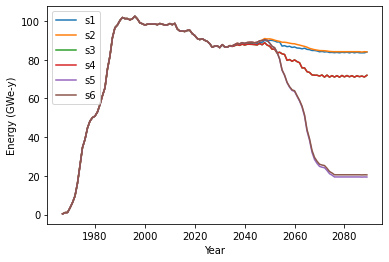

In [14]:
for key in energy:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

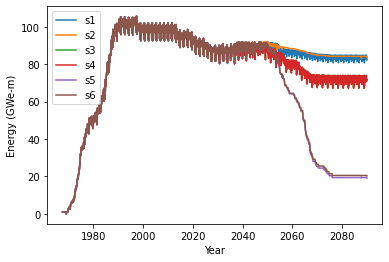

In [15]:
for key in energy:
    plt.plot(energy[key]['Monthly']['Year'], energy[key]['Monthly']['Energy'], label=key[:2])
plt.xlabel('Year')
plt.ylabel('Energy (GWe-m)')
plt.legend()

In [16]:
evaler = tm.get_metrics(out_files['s1_out'])

In [19]:
evaler.eval('TimeList')

,SimId,TimeStep
0,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,0
1,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,1
2,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,2
3,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,3
4,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,4
...,...,...
1495,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,1495
1496,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,1496
1497,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,1497
1498,9ff039bd-15ea-4f0e-9c13-dd1c40ecfb3e,1498
